<a href="https://colab.research.google.com/github/RafaelBNN/if697/blob/main/ProjetoIF697.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas necessarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/RafaelBNN/datasets/main/powerlifting3.csv") # Carregamos o dataframe

# Resumo?

# 1. Introdução / Apresentação / Coleta de Dados

In [ ]:
import requests
from io import BytesIO
from PIL import Image
url = 'https://raw.githubusercontent.com/RafaelBNN/if697/main/sbd2.jpg?token=AKYEI55RUJLWBUN6O3TY4DLA2DFH4'
page = requests.get(url)

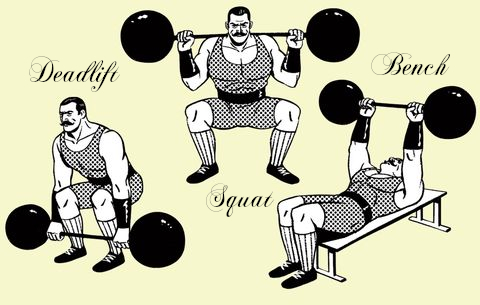

In [ ]:
Image.open(BytesIO(page.content))

O *powerlifting* é um esporte de força individual que consiste em 3 levantamentos básicos: *squat* (agachamento), *bench press* (supino) e *deadlift* (levantamento terra). Como no *weightlifting* olímpico, cada competidor tem direito a 3 tentativas em cada evento, e o objetivo é executar corretamente o exercício uma única vez com a maior carga possível. A maior carga erguida com sucesso é computada para o resultado final. Aquele que tiver o maior somatório dos 3 eventos, vence a sua categoria.
<br><br>
O dataset que será analisado foi retirado do site da IPF (*International Powerlifting Federation*) e contém dados coletados de várias competições oficias. Nosso objetivo será investigar os dados, apresentar estatísticas descritivas e realizar testes de hipóteses, a fim de obter *insights* relevantes sobre o esporte.

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/RafaelBNN/datasets/main/powerlifting3.csv") # Carregamos o dataframe

In [ ]:
df.head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,692083,Hayden Fulwood,M,SBD,Raw,18.0,18-19,MR-T3,88.0,90,NaN,NaN,NaN,NaN,167.50,NaN,NaN,NaN,NaN,122.50,NaN,NaN,NaN,NaN,227.50,517.50,1,334.25,354.31,322.27,482.79,Yes,USA,USAPL,2013-04-27,USA,AL,S.E HS State Wars
1,621012,Jozef Slimák,M,B,Multi-ply,46.0,45-49,M-M2,82.2,82.5,NaN,NaN,NaN,NaN,NaN,165.0,180.0,-190.0,NaN,180.00,NaN,NaN,NaN,NaN,NaN,180.00,1,120.85,129.06,116.68,571.78,NaN,Slovakia,WPC,2012-11-06,USA,NV,World Championships
2,164449,Chase Garrett,M,D,Raw,NaN,13-15,Teenage 13-15,44.0,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.31,70.31,1,83.29,98.28,82.94,212.28,NaN,NaN,SPF,2008-12-06,USA,NaN,Body by George Classic
3,353419,Edgar Rodea,M,SBD,Single-ply,NaN,NaN,Boys,92.9,99.7,NaN,NaN,NaN,NaN,204.12,NaN,NaN,NaN,NaN,129.27,NaN,NaN,NaN,NaN,185.97,519.36,1,326.42,326.42,314.34,420.04,Yes,NaN,THSPA,2017-01-28,USA,TX,Santo Meet
4,128144,K. Kaufman,M,B,Raw,NaN,NaN,Open,90.0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.15,NaN,NaN,NaN,NaN,NaN,145.15,6,92.66,92.66,89.30,558.46,NaN,NaN,USPF,1979-12-08,USA,ND,3rd Annual Midwestern Bench Press Championships


Descrição dos dados:

* `Name`: nome
* `Sex`: sexo
* `Event`: o(s) evento(s) em que competiu (S = squat, B = bench press, D = deadlift)
* `Equipment`: o equipamento utilizado
* `Age`: idade
* `AgeClass`: a classe de idade em que competiu
* `Division`: a divisão em que competiu
* `BodyweightKg`: o peso do corpo em kg
* `WeightClassKg`: a classe de peso em que competiu, similar a `Division`
* `SquatNKg`: a carga levantada no agachamento na *N*-ésima tentativa, em kg. Valores negativos significam tentativas falhas
* `BenchNKg`: a carga levantada no supino na *N*-ésima tentativa, em kg. Valores negativos significam tentativas falhas
* `DeadliftNKg`: a carga levantada no levantamento terra na *N*-ésima tentativa, em kg. Valores negativos significam tentativas falhas
* `Best3SquatKg`: o maior peso que levantou naquela competição no agachamento
* `Best3BenchKg`: o maior peso que levantou naquela competição no supino
* `Best3DeadliftKg`: o maior peso que levantou naquela competição no levantamento terra
* `TotalKg`: a soma de `Best3SquatKg`, `Best3BenchKg` e `Best3DeadliftKg`. Se algum desses valores for negativo, `TotalKg` é anulado
* `Place`: a colocação naquela competição. Também indica se o competidor foi desqualificado, não participou ou não foi elegível a premiação
* `Wilks`, `McCulloch` e `Glossbrenner`: coeficientes que medem a força do atleta de acordo com sexo, peso corporal, idade e peso total levantado. Buscam determinar o melhor atleta dentre todas as categorias
* `IPFPoints`: pontuação na *International Powerlifting Federation*
* `Tested`: se a competição foi testada para anti-doping ou não
* `Country`: país que representa
* `Federation`: federação que organizou a competição
* `Date`: data da competição
* `MeetCountry`: país da competição
* `MeetState`: estado da competição
* `MeetName`: nome da competição


Com a descrição dos dados acima, iremos, em seguida, realizar o pré-processamento dos dados, bem como computar estatísticas descritivas e testes de hipóteses relevantes.

# 2. Pré-processamento

O pré-processamento é um dos passos mais importantes na análise descritiva e exploratória de dados. Nessa etapa, os dados são tratados de modo que informações discrepantes, insconsistentes ou incorretas sejam estudadas e/ou removidas. Isso facilita a interpretação e evita incoerências na análise.
<br>
Essa etapa pode ser dividida em 4 subetapas:
* Definição de Tipos
* Tratamento de Dados Ausentes
* Normalização e Discretização
* Limpeza de Dados

## Definição de Tipos

*(Explicação)*

In [3]:
df.dtypes

Unnamed: 0           int64
Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Squat4Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Bench4Kg           float64
Best3BenchKg       float64
Deadlift1Kg        float64
Deadlift2Kg        float64
Deadlift3Kg        float64
Deadlift4Kg        float64
Best3DeadliftKg    float64
TotalKg            float64
Place               object
Wilks              float64
McCulloch          float64
Glossbrenner       float64
IPFPoints          float64
Tested              object
Country             object
Federation          object
Date                object
MeetCountry         object
MeetState           object
M

A partir da descrição dos tipos dos dados acima, notamos que alguns dos atributos que deveriam ter tipo `category` estão listados como `object`. As células a seguir tratam desses atributos.

In [4]:
df['Name'] = df['Name'].astype('string')
df['Sex'] = df['Sex'].astype('category')                        # astype('char')
df['Event'] = df['Event'].astype('category')                    # astype('string')
df['Equipment'] = df['Equipment'].astype('category')
df['AgeClass'] = df['AgeClass'].astype('category')
df['Division'] = df['Division'].astype('category')
df['WeightClassKg'] = df['WeightClassKg'].astype('category')
df['Place'] = df['Place'].astype('category')                    # astype('int64')
df['Tested'] = df['Tested'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Federation'] = df['Federation'].astype('category')
df['Date'] = df['Date'].astype('category')
df['MeetCountry'] = df['MeetCountry'].astype('category')
df['MeetState'] = df['MeetState'].astype('category')
df['MeetName'] = df['MeetName'].astype('category')

df['Event'].dtype, df['Equipment'].dtype # Visualizando exemplos importantes

(CategoricalDtype(categories=['B', 'BD', 'D', 'S', 'SB', 'SBD', 'SD'], ordered=False),
 CategoricalDtype(categories=['Multi-ply', 'Raw', 'Single-ply', 'Wraps'], ordered=False))

In [5]:
############### ATENCAO ############### NAO EXECUTAR ESTA CELULA ###############


#df['BodyweightKg'] = df['BodyweightKg'].astype('Int64')
#df['BodyweightKg'] = df['BodyweightKg'].fillna(0).astype(int) # isso arredonda os pesos para baixo e poe 0 nos que tiveram peso corporal NaN
# Fiz isso porque quero analisar o peso corporal e nao queria imputar dados agora

# Isso ja eh meio que uma limpeza

#df['BodyweightKg'] = df['BodyweightKg'].astype('category') # categorizando o peso corporal pra usar no grafico depois

# Na verdade eh melhor deixar como float mesmo e depois resolvo isso, senao ferra com os NaN

In [6]:
df['Place'].dtype

CategoricalDtype(categories=['1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
                  '19', '2', '20', '21', '22', '23', '24', '25', '26', '27',
                  '28', '29', '3', '30', '32', '33', '35', '36', '38', '4',
                  '43', '44', '47', '5', '50', '51', '54', '55', '56', '57',
                  '58', '6', '65', '7', '8', '82', '84', '9', 'DD', 'DQ', 'G',
                  'NS'],
                 ordered=False)

In [7]:
df.dtypes

Unnamed: 0            int64
Name                 string
Sex                category
Event              category
Equipment          category
Age                 float64
AgeClass             object
Division           category
BodyweightKg        float64
WeightClassKg      category
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place              category
Wilks               float64
McCulloch           float64
Glossbrenner        float64
IPFPoints           float64
Tested             category
Country            category
Federation         category
Date               category
MeetCountry        c

Assim, os tipos de dados foram atualizados de forma a favorecer a sua investigação.

## Tratamento de Dados Ausentes

*(Explicação)*

In [ ]:
df.isnull().sum(axis = 0)/len(df)

Unnamed: 0         0.00000
Name               0.00000
Sex                0.00000
Event              0.00000
Equipment          0.00000
Age                0.46925
AgeClass           0.44795
Division           0.00505
BodyweightKg       0.01240
WeightClassKg      0.00930
Squat1Kg           0.76470
Squat2Kg           0.76740
Squat3Kg           0.77390
Squat4Kg           0.99705
Best3SquatKg       0.27550
Bench1Kg           0.64945
Bench2Kg           0.65375
Bench3Kg           0.66385
Bench4Kg           0.99360
Best3BenchKg       0.10485
Deadlift1Kg        0.74850
Deadlift2Kg        0.75340
Deadlift3Kg        0.76355
Deadlift4Kg        0.99480
Best3DeadliftKg    0.24295
TotalKg            0.07830
Place              0.00000
Wilks              0.08425
McCulloch          0.08435
Glossbrenner       0.08425
IPFPoints          0.10560
Tested             0.22805
Country            0.72445
Federation         0.00000
Date               0.00000
MeetCountry        0.00000
MeetState          0.34105
M

### `Place`

Examinaremos, antes de tudo, a coluna `Place`. Além de mostrar a colocação dos competidores, como se é esperado, essa coluna especifica casos em que o competidor não compareceu, não foi elegível a premiação ou foi desqualificado da competição por algum motivo. Isso é mostrado da seguinte forma:

In [19]:
df['Place'].cat.categories # Esse comando mostra as categorias de um dado atributo categorico

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30',
       '32', '33', '35', '36', '38', '4', '43', '44', '47', '5', '50', '51',
       '54', '55', '56', '57', '58', '6', '65', '7', '8', '82', '84', '9',
       'DD', 'DQ', 'G', 'NS'],
      dtype='object')

* `G`: não elegível a premiação
* `DD`: desqualificado por doping
* `DQ`: desqualificado por outra razão
* `NS`: não compareceu

Investigaremos, agora, esses registros.

In [21]:
ddq = df[(df['Place']=='DQ') | (df['Place']=='DD') | (df['Place']=='NS')] # participantes desqualificados ou que nao compareceram
ddq.head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName


In [20]:
print('Porcentagem de competidores desqualificados ou que não compareceram:', len(ddq)/len(df))

Porcentagem de competidores desqualificados ou que não compareceram: 0.0


In [22]:
dg = df[df['Place']=='G'] # participantes nao elegiveis a premiacao
dg.head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
289,669746,Isabella Martin,F,SBD,Raw,8.5,5-12,FR-G,35.80,47,42.5,47.5,-50.0,47.5,22.5,25.0,27.5,27.5,63.5,67.5,72.5,72.5,147.5,G,232.71,346.74,216.71,NaN,Yes,USA,USAPL,2018-05-05,USA,MO,Missouri State Championships
867,239655,João Arsénio,M,SBD,Single-ply,NaN,NaN,M-E-G,79.00,82.5,NaN,NaN,NaN,250.0,NaN,NaN,NaN,125.0,NaN,NaN,NaN,245.0,620.0,G,426.68,426.68,412.28,537.85,Yes,NaN,EPA,2003-12-07,England,NaN,East Midlands Divisional Championships
1024,731205,Gideon Kluge,M,SBD,Raw,23.5,24-34,MR-G,99.30,105,230.0,240.0,245.0,245.0,142.5,150.0,155.0,155.0,285.0,-305.0,-305.0,285.0,685.0,G,418.07,418.07,401.88,617.08,Yes,NaN,USAPL,2017-04-29,USA,NE,Nebraska State Championships
1330,1362414,Tim Wilke,M,SBD,Multi-ply,36.0,35-39,MS,109.45,110,285.0,317.5,NaN,317.5,170.0,177.5,182.5,182.5,280.0,295.0,-300.0,295.0,795.0,G,468.58,468.58,448.95,562.70,NaN,NaN,UPA,2010-07-10,USA,IL,Illionois Powerlifting Championships
1375,888170,Gregory Costa,M,SBD,Raw,24.0,24-34,Open,96.00,100,NaN,NaN,NaN,245.0,NaN,NaN,NaN,160.0,NaN,NaN,NaN,290.0,695.0,G,430.29,430.29,414.02,640.67,Yes,USA,IPL,2018-11-08,USA,NV,Drug Tested World Championships


In [ ]:
print('Porcentagem de competidores nao elegiveis a premiacao:', len(dg)/len(df))

Porcentagem de competidores nao elegiveis a premiacao: 0.0017


Percebemos que os competidores que não foram aptos a receber premiação (que têm `'G'` na coluna `Place`) não têm a coluna `TotalKg` anulada. Esses competidores normalmente participam apenas para fazer exibições e não parecem ter efeitos negativos sobre o dataframe. Portanto, esses casos não serão removidos.

In [8]:
df = df[(df['Place']!='DQ') & (df['Place']!='DD') & (df['Place']!='NS')] # atualizando o dataframe

In [ ]:
df.head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,692083,Hayden Fulwood,M,SBD,Raw,18.0,18-19,MR-T3,88.0,90,NaN,NaN,NaN,NaN,167.50,NaN,NaN,NaN,NaN,122.50,NaN,NaN,NaN,NaN,227.50,517.50,1,334.25,354.31,322.27,482.79,Yes,USA,USAPL,2013-04-27,USA,AL,S.E HS State Wars
1,621012,Jozef Slimák,M,B,Multi-ply,46.0,45-49,M-M2,82.2,82.5,NaN,NaN,NaN,NaN,NaN,165.0,180.0,-190.0,NaN,180.00,NaN,NaN,NaN,NaN,NaN,180.00,1,120.85,129.06,116.68,571.78,NaN,Slovakia,WPC,2012-11-06,USA,NV,World Championships
2,164449,Chase Garrett,M,D,Raw,NaN,13-15,Teenage 13-15,44.0,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.31,70.31,1,83.29,98.28,82.94,212.28,NaN,NaN,SPF,2008-12-06,USA,NaN,Body by George Classic
3,353419,Edgar Rodea,M,SBD,Single-ply,NaN,NaN,Boys,92.9,99.7,NaN,NaN,NaN,NaN,204.12,NaN,NaN,NaN,NaN,129.27,NaN,NaN,NaN,NaN,185.97,519.36,1,326.42,326.42,314.34,420.04,Yes,NaN,THSPA,2017-01-28,USA,TX,Santo Meet
4,128144,K. Kaufman,M,B,Raw,NaN,NaN,Open,90.0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.15,NaN,NaN,NaN,NaN,NaN,145.15,6,92.66,92.66,89.30,558.46,NaN,NaN,USPF,1979-12-08,USA,ND,3rd Annual Midwestern Bench Press Championships


In [9]:
df[(df['Place']=='DQ') | (df['Place']=='DD') | (df['Place']=='NS')].head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName


In [23]:
len(df), 20000-len(df), (20000-len(df))/20000

(18434, 1566, 0.0783)

Foram removidos, assim, 1566 registros inválidos, o que corresponde a ~8% do total de registros.

### Tratamento - de fato - dos dados *(mudar nome depois)*

Vamos analisar a quantidade de dados nulos em cada coluna e averiguar se alguma delas contém um número muito grande de dados nulos.

In [ ]:
for coluna in df:
    print(coluna, df.isnull().sum(axis = 0)[coluna]/len(df), teste.isnull().sum(axis = 0)[coluna]/len(teste))

# Isso mostra a porcentagem de dados nulos em cada coluna
# Eh importante notar que mesmo dados que tiveram o dtype alterado ainda contem dados nulos

Unnamed: 0 0.0 0.0
Name 0.0 0.0
Sex 0.0 0.0
Event 0.0 0.0
Equipment 0.0 0.0
Age 0.46925 0.4587718346533579
AgeClass 0.44795 0.43669306715851147
Division 0.00505 0.004882282738418141
BodyweightKg 0.0124 0.00645546273190843
WeightClassKg 0.0093 0.003526093088857546
Squat1Kg 0.7647 0.7578930237604427
Squat2Kg 0.7674 0.7603341651296517
Squat3Kg 0.7739 0.7667353802755777
Squat4Kg 0.99705 0.996799392427037
Best3SquatKg 0.2755 0.24378865140501246
Bench1Kg 0.64945 0.6393078008028643
Bench2Kg 0.65375 0.6426711511337746
Bench3Kg 0.66385 0.6524899641965932
Bench4Kg 0.9936 0.9931105565802322
Best3BenchKg 0.10485 0.045947705327112946
Deadlift1Kg 0.7485 0.7352175328197895
Deadlift2Kg 0.7534 0.7389606162525768
Deadlift3Kg 0.76355 0.7495388955191494
Deadlift4Kg 0.9948 0.9945209938157752
Best3DeadliftKg 0.24295 0.18889009439079962
TotalKg 0.0783 0.0
Place 0.0 0.0
Wilks 0.08425 0.00645546273190843
McCulloch 0.08435 0.006563957903873278
Glossbrenner 0.08425 0.00645546273190843
IPFPoints 0.1056 0.02961918

In [24]:
df.isnull().sum(axis = 0)/len(df)

Unnamed: 0         0.000000
Name               0.000000
Sex                0.000000
Event              0.000000
Equipment          0.000000
Age                0.436585
AgeClass           0.436693
Division           0.004882
BodyweightKg       0.006455
WeightClassKg      0.003526
Squat1Kg           0.757893
Squat2Kg           0.760334
Squat3Kg           0.766735
Best3SquatKg       0.243789
Bench1Kg           0.639308
Bench2Kg           0.642671
Bench3Kg           0.652490
Best3BenchKg       0.045948
Deadlift1Kg        0.735218
Deadlift2Kg        0.738961
Deadlift3Kg        0.749539
Best3DeadliftKg    0.188890
TotalKg            0.000000
Place              0.000000
Wilks              0.006455
McCulloch          0.006564
Glossbrenner       0.006455
IPFPoints          0.029619
Tested             0.231746
Country            0.720896
Federation         0.000000
Date               0.000000
MeetCountry        0.000000
MeetState          0.345828
MeetName           0.000000
dtype: float64

Considerando os dados acima, podemos fazer algumas comentários:
* É possível imputar dados nos casos em que `Age` é nulo mas `AgeClass` não é (com a média de `AgeClass`, por exemplo). Também seria interessante indicar que tal dado foi imputado
* Podemos, também, imputar dados nos casos em que `BodyweightKg` é nulo mas `WeightClassKg` não é. Também seria interessante indicar que tal dado foi imputado. *Correção*: Parece que o atributo `WeightClassKg` muitas vezes foi computado com os mesmos valores que `BodyweightKg` (em vez de dar um range de peso, por exemplo); isso impossibilita a ideia de imputação. *Atualização*: Nos casos em que `WeightClassKg` é dado por apenas um valor, o peso do atleta é menor ou igual àquele valor. Nos casos em que há um '+' ao lado do número, o peso do competidor é maior que aquele valor. *Atualização 2*: depois da remoção dos registros desqualificados, a taxa de dados nulos de `BodyweightKg` caiu para 0,6%
* Naturalmente, as colunas exclusivas de cada evento terão um grande número de dados ausentes, já que os competidores não participam necessariamente de todos os 3 eventos
* ~`BodyweightKg` não contém dados nulos por causa do comando `.fillna(0)` dado anteriormente~
* Quanto maior o número da tentativa, mais dados nulos na coluna. Ex.: a coluna `Squat3Kg` tem mais dados nulos do que `Squat2Kg`. Isso acontece porque alguns atletas escolhem não realizar a terceira ou até mesmo segunda tentativa. Isso é permitido e o resultado obtido é computado da mesma forma
* ~`Squat4Kg` tem consideravelmente mais dados nulos do que `SquatXKg` porque a maioria das competições não permite 4 tentativas (o mesmo vale para supino e deadlift)~
* As colunas `SquatXKg` têm consideravelmente mais dados nulos do que a coluna `Best3SquatKg`. Isso pode indicar que algumas competições só computam as melhores tentativas **Confirmado**
* ~7% dos registros têm `TotalKg` nulo. Se, de fato, o participante não tiver realizado nenhuma tentativa (*i believe that even competitors who did not have any succesful lift still have a not null totalkg column. In that case totalkg would be a negative value*), isso justificaria a exclusão dessas linhas, já que em todos os casos na análise estudaremos a carga máxima levantada por cada competidor. *Atualização*: de fato algumas competições não registram `TotalKg` se o competidor não teve nenhuma tentativa bem-sucedida. Além disso, se o competidor falhar nas 3 tentativas de algum dos eventos, isso anula o total que seria computado~
* ~Aparentemente a coluna `Place` mostra quando o competidor foi desqualificado. Nesse caso, esses devem ser os primeiros registros a ser tratados~
* Os casos em que o atributo `Tested` é nulo podem indicar que o evento não foi testado, já que eventos testados tendem a salientar isso. **Confirmado**
* Dados nulos em `Country` podem indicar que o país do competidor é o mesmo da competição. *Atualização*: não parece importante
* `MeetState` não parece ser importante
* `Age` e `AgeClass` têm muitos dados ausentes. Isso pode dificultar a análise de carga total x idade


### `Squat4Kg`,`Bench4Kg` e `Deadlift4Kg`

In [ ]:
df.isnull().sum(axis = 0)/len(df)

Unnamed: 0         0.000000
Name               0.000000
Sex                0.000000
Event              0.000000
Equipment          0.000000
Age                0.458772
AgeClass           0.436693
Division           0.004882
BodyweightKg       0.006455
WeightClassKg      0.003526
Squat1Kg           0.757893
Squat2Kg           0.760334
Squat3Kg           0.766735
Squat4Kg           0.996799
Best3SquatKg       0.243789
Bench1Kg           0.639308
Bench2Kg           0.642671
Bench3Kg           0.652490
Bench4Kg           0.993111
Best3BenchKg       0.045948
Deadlift1Kg        0.735218
Deadlift2Kg        0.738961
Deadlift3Kg        0.749539
Deadlift4Kg        0.994521
Best3DeadliftKg    0.188890
TotalKg            0.000000
Place              0.000000
Wilks              0.006455
McCulloch          0.006564
Glossbrenner       0.006455
IPFPoints          0.029619
Tested             0.231746
Country            0.720896
Federation         0.000000
Date               0.000000
MeetCountry        0

É possível notar que as colunas `Squat4Kg`,`Bench4Kg` e `Deadlift4Kg` têm uma porcentagem bastante considerável de dados nulos. Isso acontece porque poucas competições permitem a 4ª tentativa, e esta está reservada apenas a tentativas de recordes mundiais e não é computada para o resultado final. Vamos analisar essas colunas mais detalhadamente.

In [ ]:
# numero de registros de participacao em cada evento (coluna de melhor tentativa nao nula)
ns = df['Best3SquatKg'].notnull().sum()     
nb = df['Best3BenchKg'].notnull().sum()     
nd = df['Best3DeadliftKg'].notnull().sum()  

# numero de registros de participacao em cada evento que nao realizaram 4a tentativa
ss = len(df[(df['Best3SquatKg'].notnull()) & (df['Squat4Kg'].isnull())])
bb = len(df[(df['Best3BenchKg'].notnull()) & (df['Bench4Kg'].isnull())])
dd = len(df[(df['Best3DeadliftKg'].notnull()) & (df['Deadlift4Kg'].isnull())])

print('Registros:')
print('Agachamento: ', ns)
print('Supino: ', nb)
print('Levantamento terra: ', nd)
print('')
print('Participou do evento mas nao realizou 4a tentativa:')
print('Agachamento: ', ss)
print('Supino: ', bb)
print('Levantamento terra: ', dd)
print('')
print('Porcentagem que participou do evento mas nao realizou 4a tentativa:')
print('Agachamento: ', round(ss/ns,3))
print('Supino: ', round(bb/nb,3))
print('Levantamento terra: ', round(dd/nd,3))

Registros:
Agachamento:  13940
Supino:  17587
Levantamento terra:  14952

Participou do evento mas nao realizou 4a tentativa:
Agachamento:  13881
Supino:  17460
Levantamento terra:  14851

Porcentagem que participou do evento mas nao realizou 4a tentativa:
Agachamento:  0.996
Supino:  0.993
Levantamento terra:  0.993


Dessa forma, vemos que mais de 99% dos registros de cada evento *não* inclui uma 4ª tentativa. Por isso, revela-se coerente a exclusão das colunas `Squat4Kg`, `Bench4Kg` e `Deadlift4Kg`.

In [10]:
#houses2 = houses.dropna(thresh=0.7*len(houses), axis=1)
df.drop(labels=['Squat4Kg','Bench4Kg','Deadlift4Kg'], axis=1, inplace=True)

In [11]:
df.head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,692083,Hayden Fulwood,M,SBD,Raw,18.0,18-19,MR-T3,88.0,90,NaN,NaN,NaN,167.50,NaN,NaN,NaN,122.50,NaN,NaN,NaN,227.50,517.50,1,334.25,354.31,322.27,482.79,Yes,USA,USAPL,2013-04-27,USA,AL,S.E HS State Wars
1,621012,Jozef Slimák,M,B,Multi-ply,46.0,45-49,M-M2,82.2,82.5,NaN,NaN,NaN,NaN,165.0,180.0,-190.0,180.00,NaN,NaN,NaN,NaN,180.00,1,120.85,129.06,116.68,571.78,NaN,Slovakia,WPC,2012-11-06,USA,NV,World Championships
2,164449,Chase Garrett,M,D,Raw,NaN,13-15,Teenage 13-15,44.0,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.31,70.31,1,83.29,98.28,82.94,212.28,NaN,NaN,SPF,2008-12-06,USA,NaN,Body by George Classic
3,353419,Edgar Rodea,M,SBD,Single-ply,NaN,NaN,Boys,92.9,99.7,NaN,NaN,NaN,204.12,NaN,NaN,NaN,129.27,NaN,NaN,NaN,185.97,519.36,1,326.42,326.42,314.34,420.04,Yes,NaN,THSPA,2017-01-28,USA,TX,Santo Meet
4,128144,K. Kaufman,M,B,Raw,NaN,NaN,Open,90.0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.15,NaN,NaN,NaN,NaN,145.15,6,92.66,92.66,89.30,558.46,NaN,NaN,USPF,1979-12-08,USA,ND,3rd Annual Midwestern Bench Press Championships


### `Age` e `AgeClass`

Outra observação que pode ser feita é que há uma diferença significativa entre a quantidade de dados nulos na coluna `Age` e na coluna `AgeClass`. Isso significa que alguns registros têm a coluna `Age` nula e a coluna `AgeClass` não-nula. Sendo assim, temos a oportunidade de imputar dados para a coluna `Age` a partir da coluna `AgeClass`. 
<br>
Uma ideia seria imputar `Age` como a média dos limites de `AgeClass`. Também podemos fazer isso de acordo com os vizinhos mais próximos comparando a carga levantada, utilizando o algoritmo KNN. Vamos fazer a imputação das duas formas e compará-las para decidir a melhor.
<br>
Dito isso, vamos, primerio, investigar os registros nulos e não-nulos de `Age` e `AgeClass`.

In [12]:
nullage = df['Age'].isnull().sum()
nullageclass = df['AgeClass'].isnull().sum()
notnullageclass = df['AgeClass'].notnull().sum()
nullagenotnullclass = len(df[(df['Age'].isnull())&(df['AgeClass'].notnull())])

print('Numero de valores nulos em "Age":', nullage)
print('Porcentagem do numero total de registros:', nullage/len(df))
print('')
print('Numero de valores nulos em "AgeClass":', nullageclass)
print('Porcentagem do numero total de registros:', nullageclass/len(df))
print('')
print('Numero de registros com "Age" nulo e "AgeClass" nao-nulo:', nullagenotnullclass)
print('Porcentagem do numero total de registros:', nullagenotnullclass/len(df))

#print('Diferenca entre numero de registros nulos em "Age" e nao nulos em "AgeClass":', nullage-nullageclass)

Numero de valores nulos em "Age": 8457
Porcentagem do numero total de registros: 0.4587718346533579

Numero de valores nulos em "AgeClass": 8050
Porcentagem do numero total de registros: 0.43669306715851147

Numero de registros com "Age" nulo e "AgeClass" nao-nulo: 409
Porcentagem do numero total de registros: 0.022187262666811328


Concluímos, assim, que há 409 casos que podem ter a coluna `Age` imputada. Isso corresponde a 2,21% dos dados. A forma com que os dados serão imputados será com a média dos limites da `AgeClass` daquele competidor. Ao final da imputação, vamos computar gráficos que vão dar uma ideia sobre a utilidade e possível impacto negativo (*hopefully not*) da imputação.
<br><br>
Vamos analisar esses casos.

In [13]:
df['AgeClass'] = df['AgeClass'].astype('string') # setando como string so pra ter certeza que vai dar pra fazer a analise.
# Talvez setar o tipo pra category tambem seja uma boa ideia

In [15]:
df['AgeClass'] = df['AgeClass'].astype('category')

In [14]:
df[(df['Age'].isnull())&(df['AgeClass'].notnull())].head() # registros com Age nulo e AgeClass nao nulo

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
2,164449,Chase Garrett,M,D,Raw,NaN,13-15,Teenage 13-15,44.00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.31,70.31,1,83.29,98.28,82.94,212.28,NaN,NaN,SPF,2008-12-06,USA,NaN,Body by George Classic
16,1398692,Nick Russo,M,SBD,Wraps,NaN,20-23,Amateur Juniors 20-23,73.12,75,NaN,NaN,NaN,185.97,NaN,NaN,NaN,113.4,NaN,NaN,NaN,226.80,526.17,1,381.73,381.73,369.47,562.13,Yes,NaN,RPS,2015-03-21,USA,NY,Dominion
172,579972,Bjørn Henrik Kvamme,M,B,Single-ply,NaN,24-34,Open,85.50,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0,NaN,NaN,NaN,NaN,175.00,1,114.83,114.83,110.78,546.42,Yes,NaN,NSF,2001-05-12,Norway,NaN,KM
185,1290906,Bruce Hellwinkel,M,B,Raw,NaN,45-49,Masters 1,110.50,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.5,NaN,NaN,NaN,NaN,197.50,1,116.07,122.45,111.16,668.30,Yes,NaN,CPU,2013-12-07,Canada,QC,Montreal Open
196,1375177,Artis Kronbergs,M,B,Raw,NaN,20-23,J,102.20,110,NaN,NaN,NaN,NaN,-160.0,160.0,-170.0,160.0,NaN,NaN,NaN,NaN,160.00,2,96.55,96.55,92.73,567.50,NaN,NaN,WPC-Latvia,2011-12-17,Latvia,NaN,Latvian Championships


Olhando apenas essas 2 colunas, temos:

In [16]:
df[(df['Age'].isnull())&(df['AgeClass'].notnull())][['Age','AgeClass']]

,Age,AgeClass
2,NaN,13-15
16,NaN,20-23
172,NaN,24-34
185,NaN,45-49
196,NaN,20-23
...,...,...
19657,NaN,20-23
19678,NaN,40-44
19722,NaN,20-23
19839,NaN,18-19


Perceba que o atributo `AgeClass` é dado no formato `x-y`, onde `x` e `y` são números inteiros. Vamos usar a função `.split()` para obter os valores de `x` e `y` e calcular a média.

In [ ]:
x, y = '20-23'.split('-')
print(x,y, int(x)+int(y))

20 23 43


In [17]:
# Tentar usando df.apply(). Talvez o jeito de fazer seja df['Age'].apply()
def meanAgeClass(agecl): # a ideia eh passar o atributo AgeClass respectivo de cada registro como parametro da funcao
    x, y = agecl.split('-')
    return np.mean([int(x),int(y)])

#df['X'] = df.apply(lambda row : normalize(row['X'],row['Y']), axis = 1)
#df['Age'] = df[(df['Age'].isnull())&(df['AgeClass'].notnull())].apply(lambda row: meanAgeClass(row['AgeClass']), axis=1) # isso aplicou a funcao para todos os registros, nao apenas para aqueles passiveis de imputacao
#df[(df['Age'].isnull())&(df['AgeClass'].notnull())]['Age'] = df[(df['Age'].isnull())&(df['AgeClass'].notnull())].apply(lambda row: meanAgeClass(row['AgeClass']), axis=1)
#df.loc[df['Age'].isnull(),df['AgeClass'].notnull()]['Age'] = df[(df['Age'].isnull())&(df['AgeClass'].notnull())].apply(lambda row: meanAgeClass(row['AgeClass']), axis=1)


#dfd = dfc.copy() # Posso usar isso para comparar formas de imputacao diferentes


#mask = dfd['a'].str.startswith('o')
#dfd.loc[mask, 'c'] = 42

#df[(df['Age'].isnull())&(df['AgeClass'].notnull())]['Age'] = df[(df['Age'].isnull())&(df['AgeClass'].notnull())].apply(lambda row: meanAgeClass(row['AgeClass']), axis=1)

mask = (df['Age'].isnull())&(df['AgeClass'].notnull())
df.loc[mask, 'Age'] = df[mask].apply(lambda row: meanAgeClass(row['AgeClass']), axis=1)

# Se eu nao conseguir aplicar a funcao do jeito que ta, eu posso dividir o dataframe de acordo com AgeClass e aplicar manulamente

Assim, fizemos a imputação de acordo com a média de `AgeClass`.

In [18]:
nullage = df['Age'].isnull().sum()
nullageclass = df['AgeClass'].isnull().sum()
notnullageclass = df['AgeClass'].notnull().sum()
nullagenotnullclass = len(df[(df['Age'].isnull())&(df['AgeClass'].notnull())])

print('Numero de valores nulos em "Age":', nullage)
print('Porecentagem do numero total de registros:', nullage/len(df))
print('')
print('Numero de valores nulos em "AgeClass":', nullageclass)
print('Porecentagem do numero total de registros:', nullageclass/len(df))
print('')
print('Numero de registros com "Age" nulo e "AgeClass" nao nulo:', nullagenotnullclass)
print('Porcentagem do numero total de registros:', nullagenotnullclass/len(df))
print('')
print('Diferenca entre numero de registros nulos em "Age" e nao nulos em "AgeClass":', nullage-nullageclass)

Numero de valores nulos em "Age": 8048
Porecentagem do numero total de registros: 0.4365845719865466

Numero de valores nulos em "AgeClass": 8050
Porecentagem do numero total de registros: 0.43669306715851147

Numero de registros com "Age" nulo e "AgeClass" nao nulo: 0
Porcentagem do numero total de registros: 0.0

Diferenca entre numero de registros nulos em "Age" e nao nulos em "AgeClass": -2


Os valores acima confirmam que a imputação de fato ocorreu.

In [ ]:
df['WeightClassKg'].dtype

CategoricalDtype(categories=['100', '100+', '102', '105', '107', '107.9', '107.9+',
                  '109.7', '110', '110+',
                  ...
                  '90.7', '93', '93+', '93.8', '94', '95', '97', '99.3',
                  '99.7', '99.7+'],
                 ordered=False)

## Discretização / Normalização

*Discretização não-supervisionada é o mesmo que plotar num histograma?* **Sim**

Discretização Supervisionada: 
* Prever (?) a carga que um competidor consegue levantar de acordo com idade

---

Discretização Não-Supervisionada: 
* `IPFPoints` x count
* Mesma Frequência: ver quantos indivíduos conseguem levantar certo peso (carga x count)


## Limpeza de Dados

*(Bagui de outlier)*

***Professor***: *Univariado pra place ou idade* 

*Mahalanobis pode ser interessante já que vai existir uma covariância positiva entre peso corporal e carga levantada*

# 3. Estatísticas Descritivas

*Em relação aos Testes de Hipóteses, as Estatísticas Descritivas são uma versão "mais simples". Pode-se pensar neste tópico como sendo um estudo para descrever* **todos** *os registros. Por outro lado, nos Testes de Hipóteses separamos os registros em diferentes grupos e comparamos valores de tendências de atributos entre esses grupos.*

## Peso Corporal x Carga Máxima Supino

In [ ]:
dfbench = df.dropna(subset=['Best3BenchKg']) # dfbench contem todos os atletas que participaram do evento de supino

In [ ]:
dfbench['Best3BenchKg'].dtype

dtype('float64')

<BarContainer object of 17875 artists>

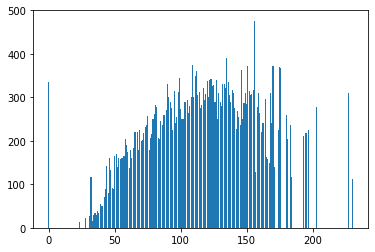

In [ ]:
# A ideia eh plotar a media de peso levantado no supino de acordo com o peso corporal
plt.bar(dfbench[dfbench.Best3BenchKg>0].BodyweightKg, dfbench[dfbench.Best3BenchKg>0].Best3BenchKg)

* Lembrando que a coluna em zero indica os competidores que não tiveram seus pesos computados
* Também é interessante observar que existem alguns outliers com relação ao peso corporal
* Ainda acho que é melhor fazer uma média

In [ ]:
len(dfbench[dfbench.Best3BenchKg>0].BodyweightKg)

17875

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


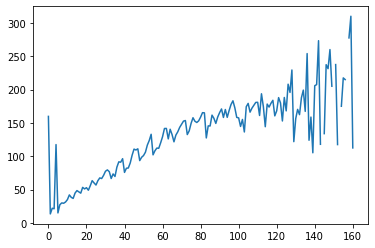

In [ ]:
#houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean()
#plt.plot(dfbench[dfbench['BodyweightKg]>24].groupby(['BodyweightKg'])['Best3BenchKg'].mean()) isso deu errado porque Bodyyweight eh uma categoria, nao um inteiro
plt.plot(dfbench.groupby(['BodyweightKg'])['Best3BenchKg'].mean())

In [ ]:
plt.plot(dfbench['BodyweightKg'], dfbench['BodyweightKg'].Best3BenchKg.mean())

AttributeError: ignored

## Idade x Carga Total Levantada

## Squat x Bench x Deadlift 

# 4. Testes de Hipóteses

*A diferença de Estatísticas Descritivas pra Testes de Hipóteses tem alguma coisa a ver com bagui discreto ou continuo. Lembro que o professor falou de diferença de sexo.* ***Atualização*** *: Os testes de hipóteses têm como objetivo fazer perguntas sobre os dados com o intuito de obter insights importantes, a partir de comparação. Ex: peso levantado por homem vs peso levantado por mulher, peso levantado por pessoas de 20-25 anos vs peso levantado por pessoas de 30-35, peso levantado no raw deadlift vs usando straps, etc.*

## Diferença entre meninos e meninas de 5-12 anos

## Straps x Deadlift